In [59]:
import sys, importlib
importlib.reload(sys.modules['test'])

<module 'test' from 'C:\\Users\\mmazzolini\\OneDrive - Scientific Network South Tyrol\\Documents\\conda\\Runoff_prediction\\Snow_experiment\\..\\test.py'>

In [1]:
import sys
sys.path.insert(0, "..")

from sf_runoff import daily_climatology, spatial_avg_daily_input, spatial_stats_daily_input, compute_anomalies, create_it_matrix
from nested_CV import SVR_nested_CV_gridsearch, SVR_PCA_nested_CV_gridsearch
from test import evaluate_prediction, plot_prediction, plot_anomalies
from test import nested_CV_PCA_SVR_predict, nested_CV_SVR_predict
from classic_CV_predict import classic_CV_PCA_SVR_predict, classic_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import os
import pdb
import seaborn as sns

## A) ALL_VARS, T_UNIT = 30

In [2]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\old\\'

daily_input = pd.read_csv(path+'SAN_BENIGNO_ORCO_2002_2019.csv', index_col=0, parse_dates=True)

daily_input_stat = spatial_stats_daily_input(daily_input)

t_unit=30


#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-1.5, 1.5, 10)
epsilon_range=np.logspace(-5, -2, 5)
#n_range = [17, 50, 200]
components_range = [5*4*36]
#do not enlarge t_range for now
t_range=[12]
t_length=t_range[0]
n_splits=5
test_size=365

<AxesSubplot:>

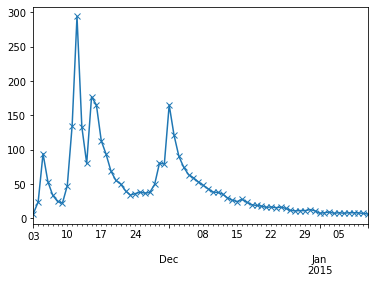

In [6]:
daily_input.Q[-1520:-1450].plot(marker='x')

In [4]:
daily_input_stat=daily_input_stat[[c for c in daily_input_stat.columns if c[0] != 'R']]

Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"



C3=0.6812920690579611
eps3=0.01


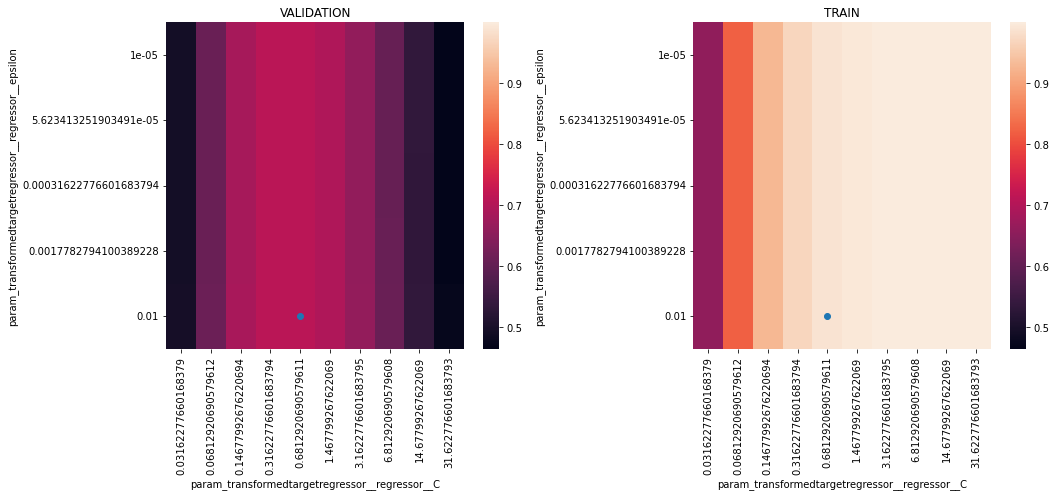

In [3]:
C, eps = SVR_nested_CV_gridsearch(daily_input_stat, C_range,epsilon_range, t_range,t_unit,n_splits,test_size)
print(f'C3={C}')
print(f'eps3={eps}') 

In [5]:
C=0.6812920690579611
eps=0.01

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [6]:
radius_for_ensemble = 1
predictions = nested_CV_SVR_predict(daily_input_stat, C, eps, t_length,t_unit, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

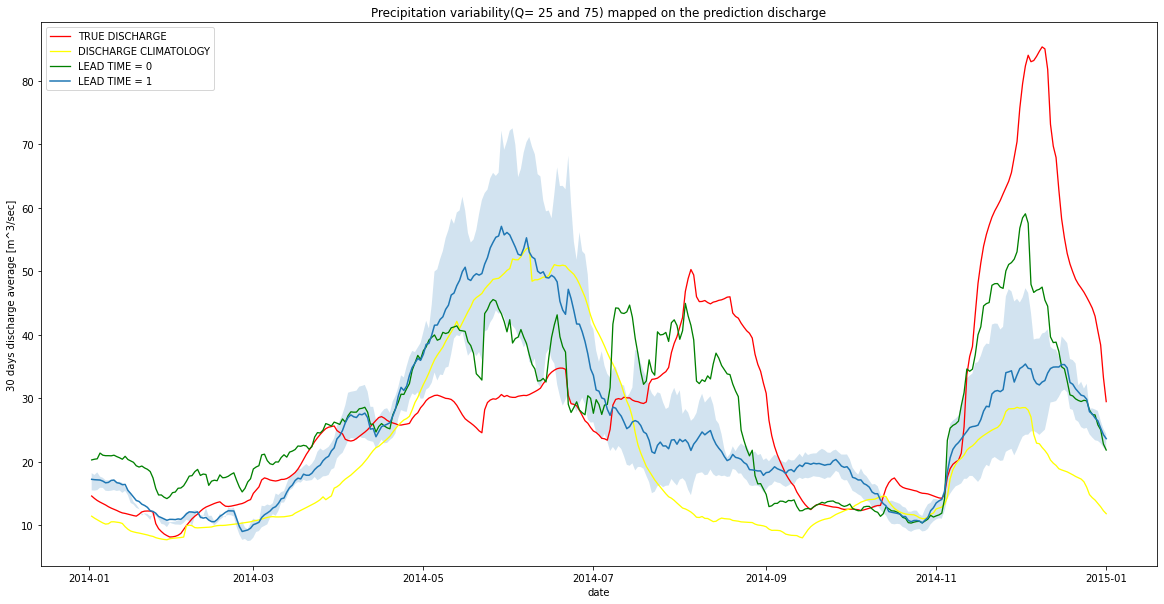

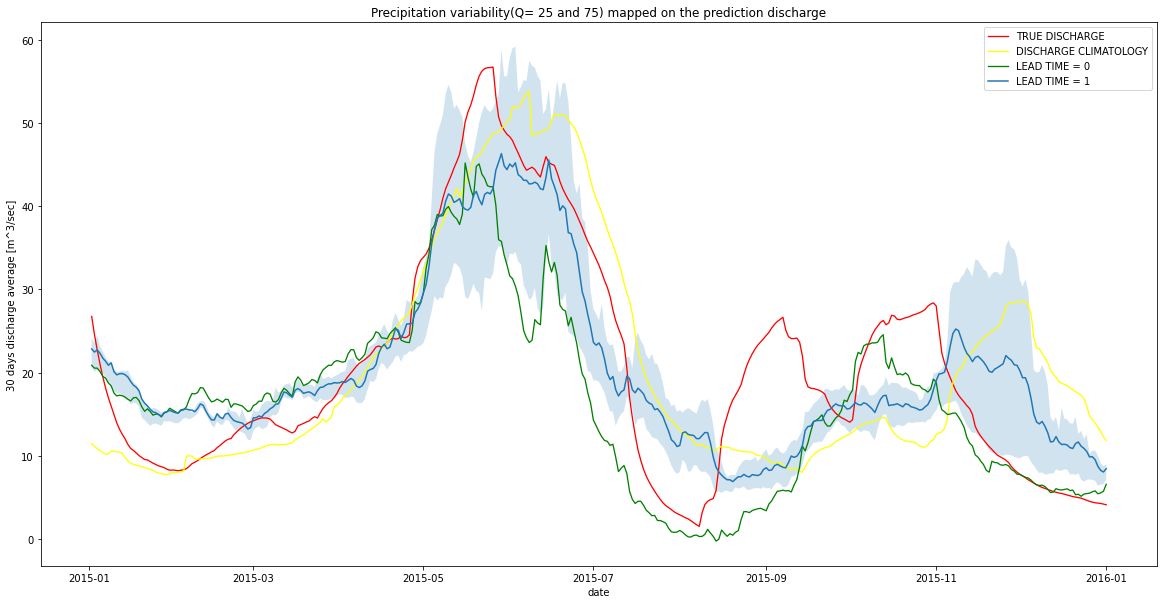

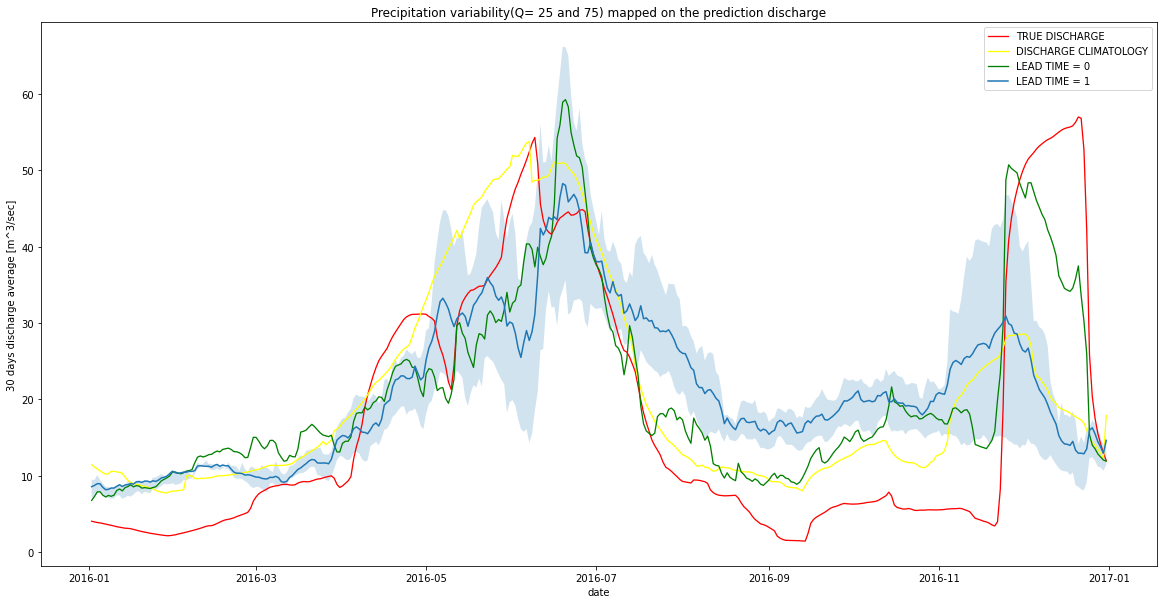

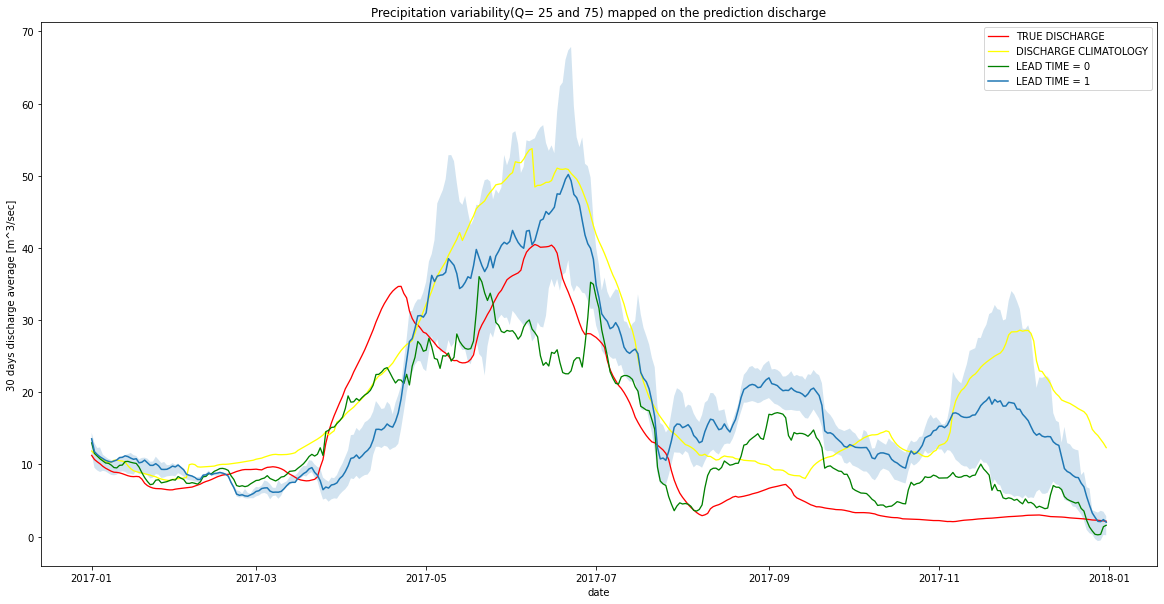

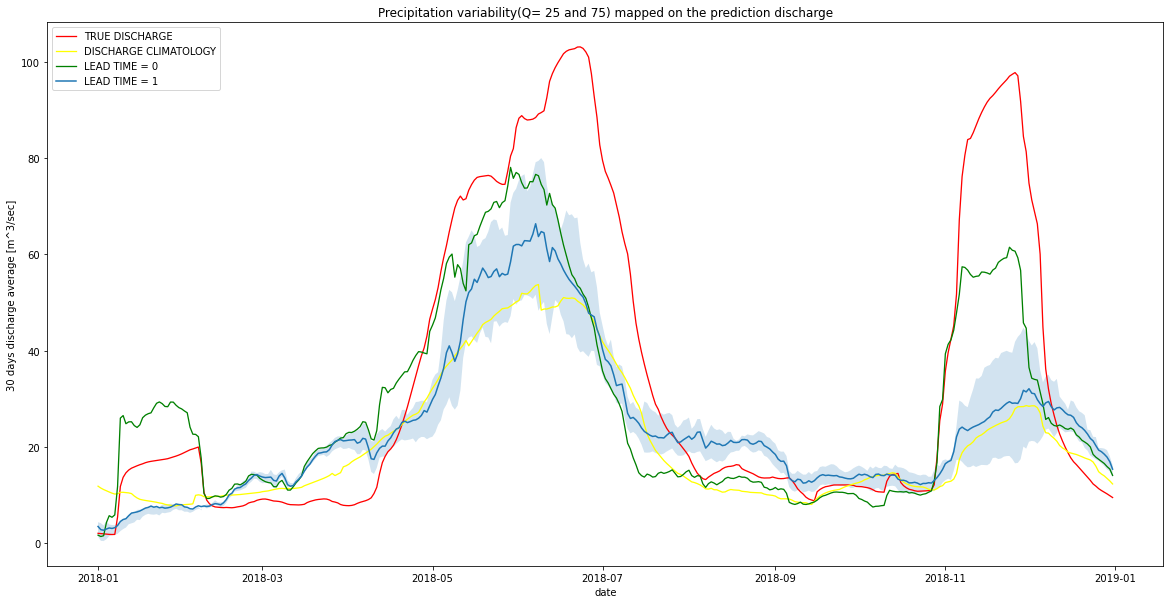

In [7]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions)

In [35]:
pred

true_runoff  runoff_clim     trueTP  climTP_lt1  climTP_lt1_Q25  \
2018-01-01     2.061333    11.856429   1.630359    3.258831        1.205416   
2018-01-02     2.003667    11.463381   1.387752    2.649719        0.411869   
2018-01-03     1.953000    11.157405   1.541321    2.551029        0.388679   
2018-01-04     1.892333    10.894286   4.216631    2.815831        0.780094   
2018-01-05     1.840333    10.647333   5.625312    3.060833        1.482606   
...                 ...          ...        ...         ...             ...   
2018-12-27    10.953667    14.373644  17.219655   19.244836       16.789818   
2018-12-28    10.617000    13.998000  16.757003   18.707640       16.223655   
2018-12-29    10.263667    13.475622  16.026893   17.982859       15.441048   
2018-12-30     9.892000    12.949422  15.481726   17.000342       14.993716   
2018-12-31     9.499333    12.318911  14.110417   15.379588       13.653627   

            climTP_lt1_Q75  climTP_lt2  climTP_lt2_Q25  climTP_lt2_Q75  \
2018-01-01        4.143496    5.040687        1.279446        8.142362   
2018-01-02        3.985303    4.413423        0.303035        8.303622   
2018-01-03        3.537679    3.976629        0.130880        7.397583   
2018-01-04        4.402472    4.009769        0.468100        7.402041   
2018-01-05        3.774081    3.995604        1.253546        5.642717   
...                    ...         ...             ...             ...   
2018-12-27       20.006258   14.221377        9.198894       17.429683   
2018-12-28       19.873330   14.366688        9.419533       17.921100   
2018-12-29       19.453999   15.832673       11.171326       19.432334   
2018-12-30       18.115720   14.993894       10.881350       18.118736   
2018-12-31       16.224165   14.876648       11.280923       17.461312   

            climTP_lt3  climTP_lt3_Q25  climTP_lt3_Q75  climTP_lt4  \
2018-01-01    9.184949        4.838512       12.132778    9.800268   
2018-01-02    8.465286        3.724740       12.171714    9.064478   
2018-01-03    8.009001        3.603351       11.286087    8.595290   
2018-01-04    7.985730        3.691651       11.555961    8.515356   
2018-01-05    7.860835        4.017384       10.431219    8.284677   
...                ...             ...             ...         ...   
2018-12-27   15.358952       10.606922       18.503524   14.340171   
2018-12-28   14.888281       10.309118       18.457822   13.946806   
2018-12-29   14.830955       10.537821       18.332163   13.873256   
2018-12-30   14.052800       10.401959       17.149820   13.266644   
2018-12-31   13.213916        9.978583       15.712746   12.435033   

            climTP_lt4_Q25  climTP_lt4_Q75  climTP_lt5  climTP_lt5_Q25  \
2018-01-01        5.018373       12.964665   11.630879        7.092435   
2018-01-02        3.939560       12.858128   10.953871        6.361805   
2018-01-03        3.804984       12.519376   10.428272        6.207786   
2018-01-04        3.868390       12.612014   10.282813        6.283369   
2018-01-05        4.147431       11.243296   10.261510        6.597815   
...                    ...             ...         ...             ...   
2018-12-27       10.393773       17.463941   19.653872       14.701685   
2018-12-28       10.054703       17.585867   19.042270       14.217697   
2018-12-29       10.179839       17.429176   18.257243       13.863308   
2018-12-30       10.004559       16.493214   17.001396       13.361135   
2018-12-31        9.596803       15.078388   15.873795       12.906668   

            climTP_lt5_Q75  split       date  
2018-01-01       15.555605      4 2018-01-01  
2018-01-02       15.398825      4 2018-01-02  
2018-01-03       14.943191      4 2018-01-03  
2018-01-04       14.740903      4 2018-01-04  
2018-01-05       13.566507      4 2018-01-05  
...                    ...    ...        ...  
2018-12-27       24.015067      4 2018-12-27  
2018-12-28       23.911042      4 2018-12-28  
2018-12-29       22.7

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
No handles with labels found to put in legend.
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
No handles with labels found to put in legend.
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A val

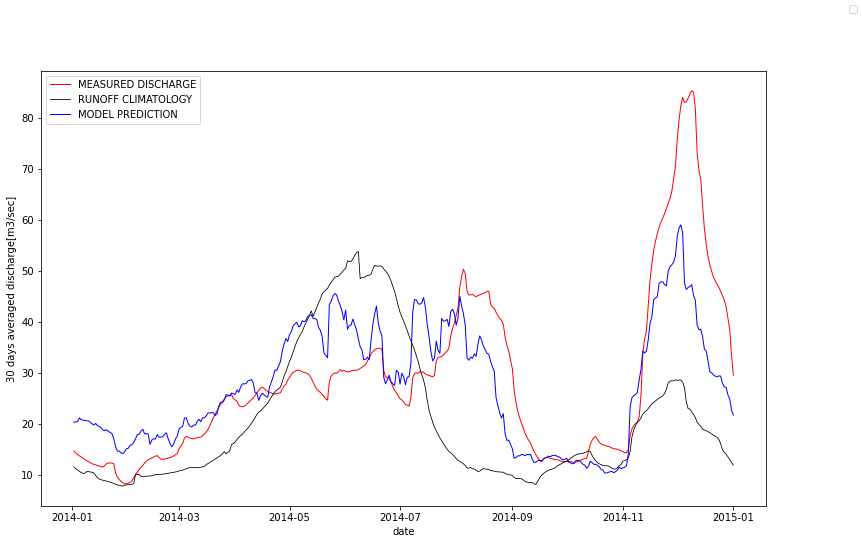

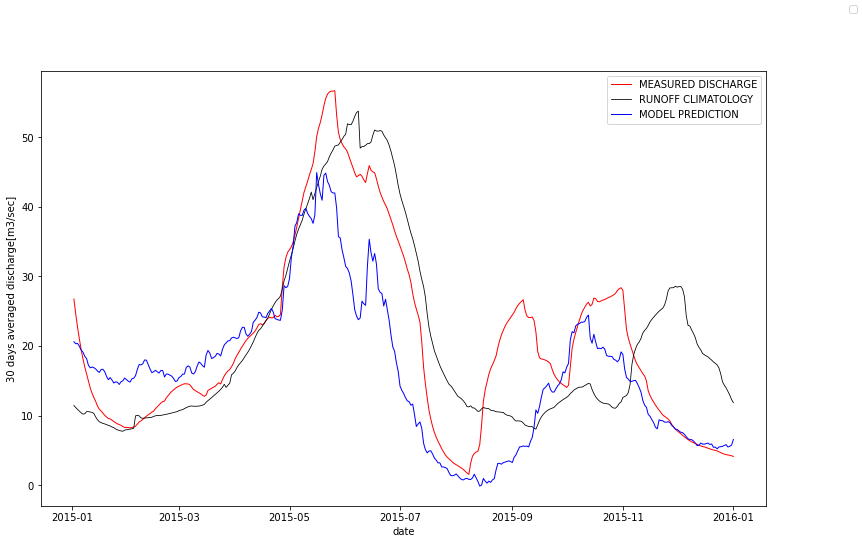

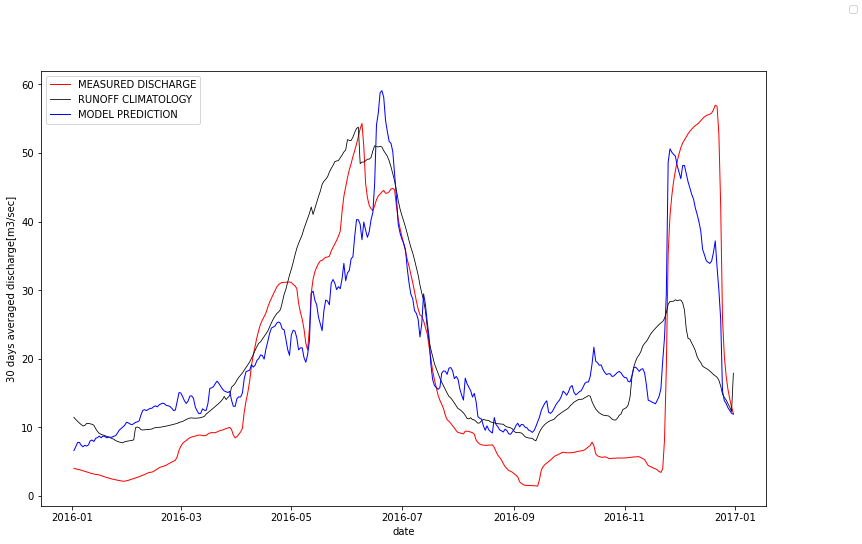

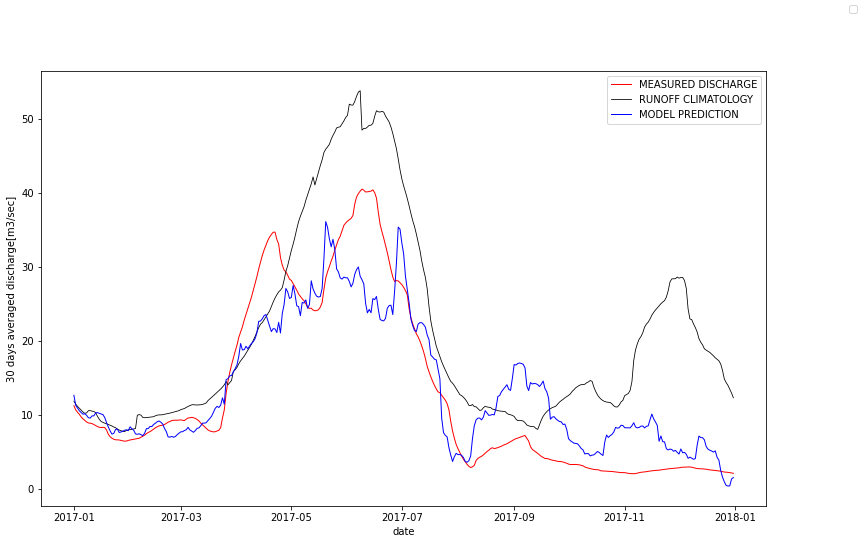

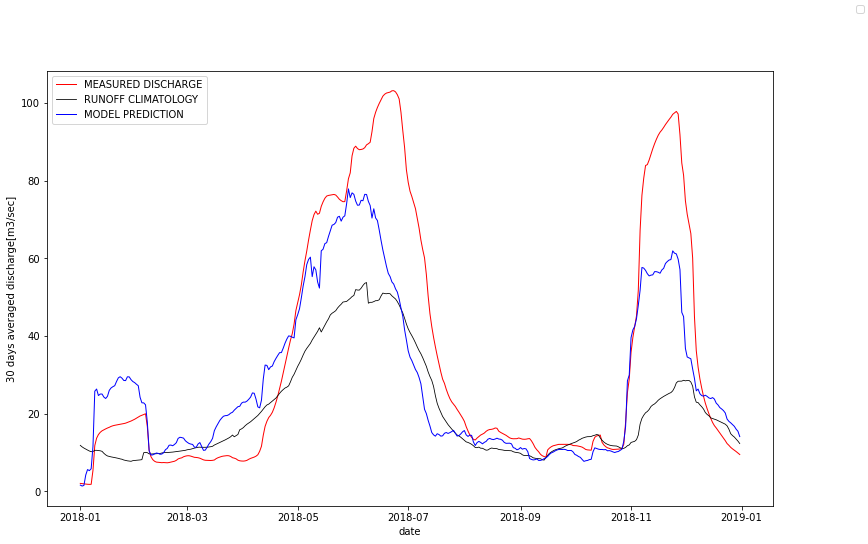

In [39]:
    prediction=predictions
    splits=prediction['split'].max()
    
    for i in range(splits+1):
        query=f'split=={i}'
        #query='split==' + str(i)
        pred=prediction.query(query)
        pred.loc[:,'date']= pred.index
        #pred=pred[['true_runoff','runoff_clim','trueTP']]
        
        ax,fig=plt.subplots(figsize=(13,8))
        #plot the real
        sns.lineplot(y=("true_runoff"), x="date", data=pred, color='red',linewidth=1,legend='auto',)
        sns.lineplot(y=("runoff_clim"),x="date",data=pred,color='black',linewidth=0.8,legend='auto')
        sns.lineplot(y=("trueTP"),x="date",data=pred,color='blue',linewidth=1,legend='auto')
        
        ax.legend()
        #plt.fill_between(x=pred.index, y1=50, y2=80, alpha=0.2)
        
        fig.set(ylabel='30 days averaged discharge [m3/sec]')
        plt.legend(['MEASURED DISCHARGE','RUNOFF CLIMATOLOGY','MODEL PREDICTION'])    



        
        """
        #plot the lead_time_
        lt1=pred[["climTP_lt1","climTP_lt1_Q25","climTP_lt1_Q75"]]
        #lt1.columns=np.repeat('climatologia_lt1_ensemple_prec',3)
        sns.lineplot(data=lt1["climTP_lt1"],legend='auto')
        """
        

In [70]:
import sys, importlib
importlib.reload(sys.modules['test'])
from test import evaluate_prediction

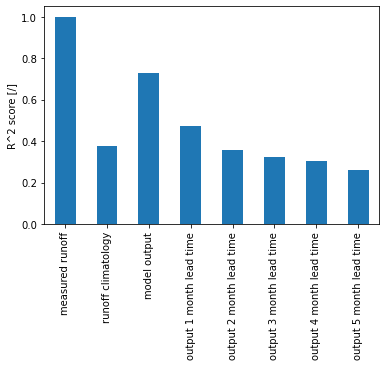

In [71]:
r2_A= evaluate_prediction(predictions)

### ANALYSE RESULTS AS ANOMALIES

### 1) PREDICT THE WHOLE SERIES WITH CLASSIC CV

In [73]:
predictions_for_clim = classic_CV_SVR_predict(daily_input_stat, C, eps, t_length,t_unit, n_splits)

In [74]:
climatologies =predictions_for_clim.groupby(by=predictions_for_clim.index.day_of_year).mean().loc[:,['prediction','true_runoff']]
climatologies['doty']=climatologies.index


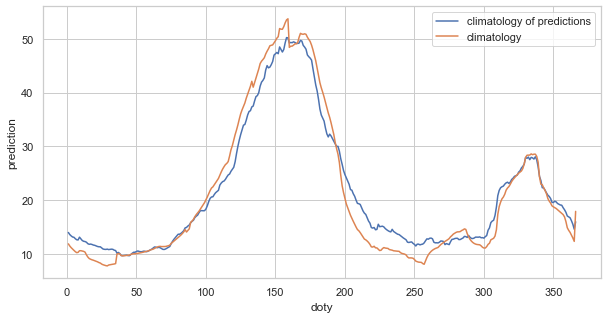

In [76]:
sns.set_theme(style="whitegrid")
ax,fig=plt.subplots(figsize=(10,5))
sns.lineplot(data=climatologies,x='doty',y='prediction',label='climatology of predictions')
sns.lineplot(data=climatologies,x='doty',y='true_runoff',label='climatology')
plt.legend()

### 2) COMPUTE THE ANOMALIES AND PLOT THEM

In [80]:
a=compute_anomalies(climatologies, predictions)
a['split']=predictions.split

#plot_anomalies(a)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

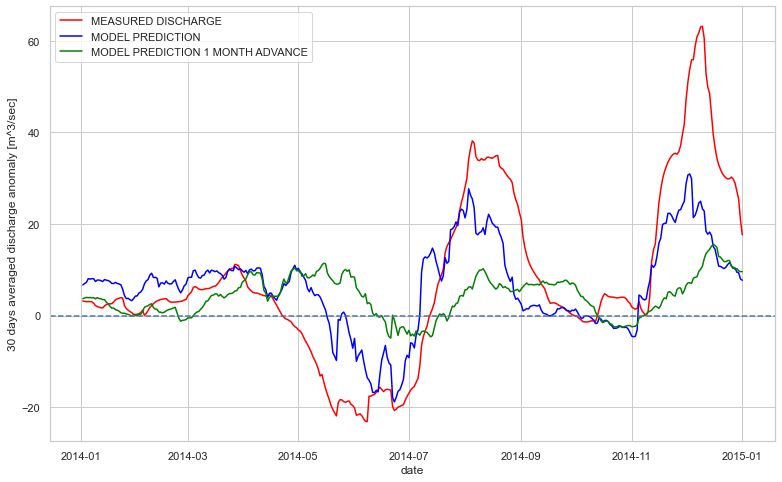

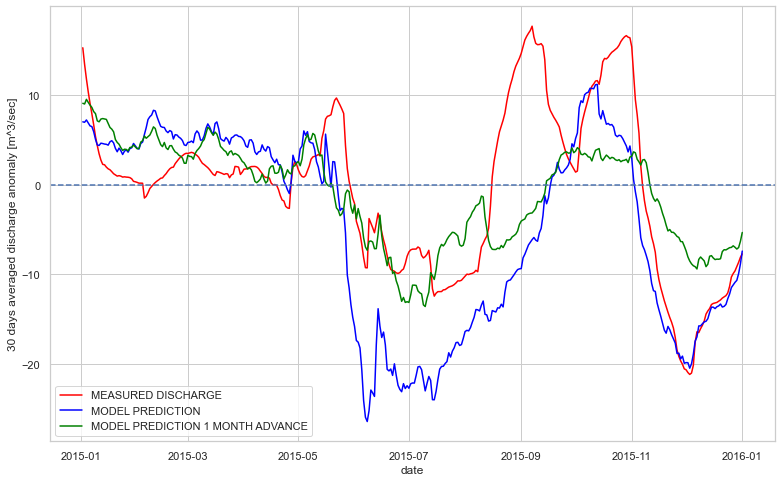

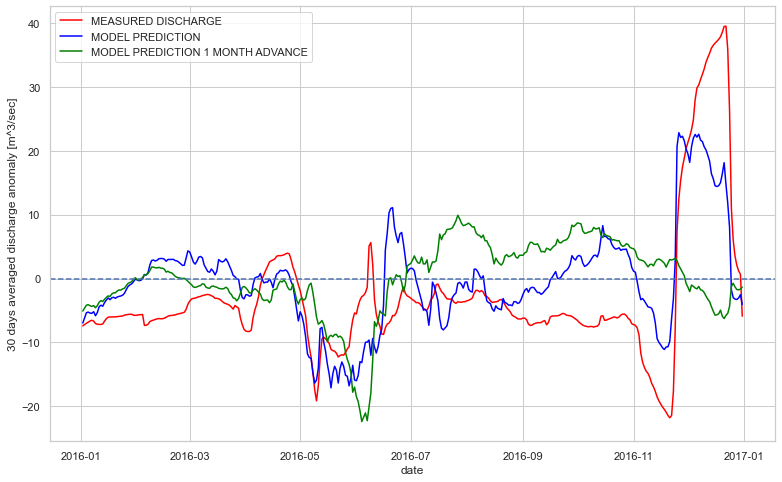

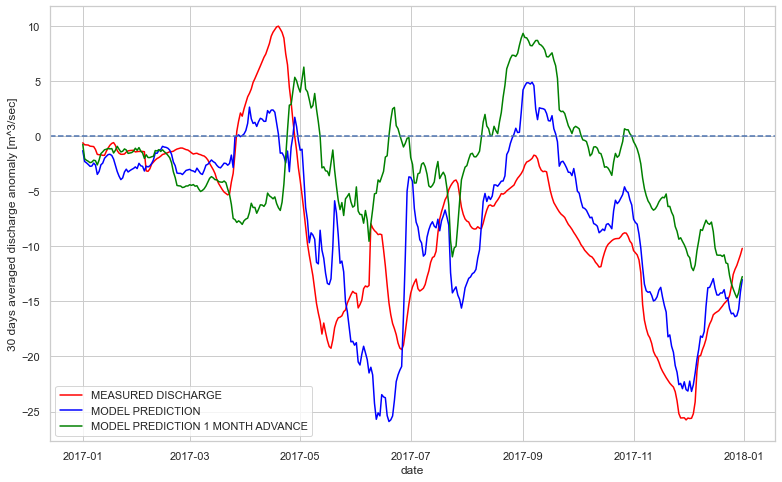

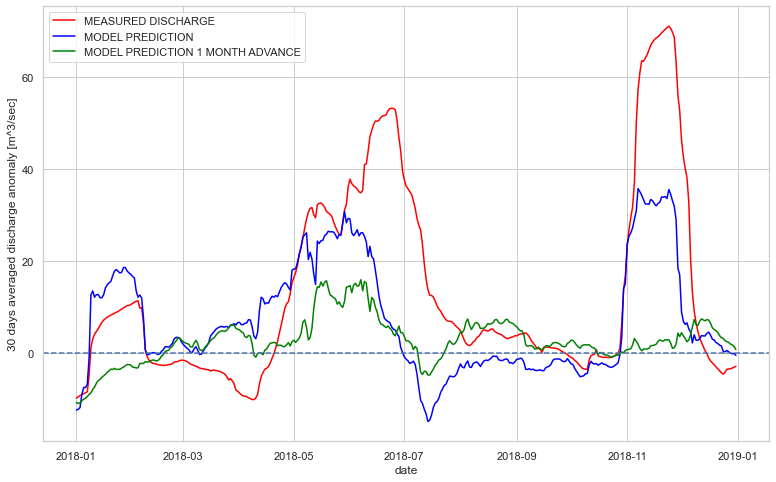

In [86]:
    prediction=a
    
    splits=prediction['split'].max()
    for i in range(splits+1):
        query=f'split=={i}'
        #query='split==' + str(i)
        pred=prediction.query(query)
        pred.loc[:,'date']= pred.index

        ax,fig=plt.subplots(figsize=(13,8))
        #plot the real
        sns.lineplot(y=("true_runoff"),x="date",data=pred,color='red',linewidth=1.5,legend='auto')
        sns.lineplot(y=("trueTP"),     x="date",data=pred,color='blue',linewidth=1.5,legend='auto')


        #plot the lead_time_
        lt1=pred[["climTP_lt1","climTP_lt1_Q25","climTP_lt1_Q75"]]
        #lt1.columns=np.repeat('climatologia_lt1_ensemple_prec',3)
        sns.lineplot(data=lt1["climTP_lt1"],legend='auto',color='green')
        #plt.fill_between(x=lt1.index, y1=lt1['climTP_lt1_Q25'], y2=lt1['climTP_lt1_Q75'], alpha=0.2)
        
        """
        #plot the lead_time_
        lt4=pred[["climTP_lt4","climTP_lt4_Q25","climTP_lt4_Q75"]]
        #lt4.columns=np.repeat('climatologia_lt4_ensemple_prec',3)
        sns.lineplot(data=lt4["climTP_lt4"], palette=['green'],legend='auto')
        plt.fill_between(x=lt4.index, y1=lt4['climTP_lt4_Q25'], y2=lt4['climTP_lt4_Q75'], alpha=0.2)
        """
        
        plt.axhline(0,ls='--')
        plt.ylabel('30 days averaged discharge anomaly [m^3/sec]')

        plt.legend(['MEASURED DISCHARGE','MODEL PREDICTION','MODEL PREDICTION 1 MONTH ADVANCE'])
        #plt.title("Anomalies plotting")
        
        

## B) NO_SNOW

In [11]:
daily_input_stat2 = daily_input_stat.drop(columns=[c for c in daily_input_stat.columns if c[0]=='S'])


In [12]:
#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-1.5, 1.5, 10)
epsilon_range=np.logspace(-5, -2, 5)


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"



C2=0.31622776601683794
eps2=0.01


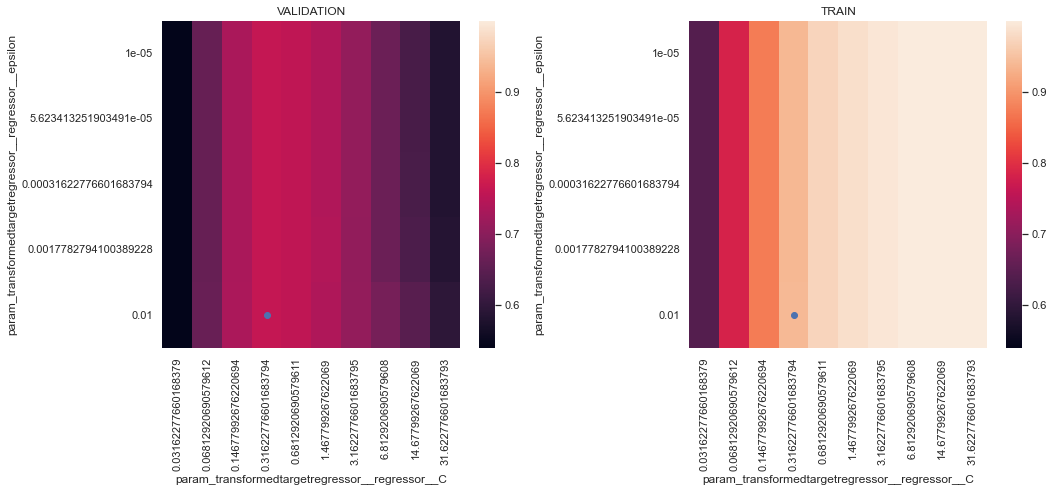

In [13]:
C2, eps2 = SVR_nested_CV_gridsearch(daily_input_stat2, C_range,epsilon_range, t_range,t_unit,n_splits,test_size)
print(f'C2={C2}')
print(f'eps2={eps2}')

In [14]:
C2=0.5623413251903491
eps2=0.005623413251903491

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [15]:
radius_for_ensemble = 1
predictions2 = nested_CV_SVR_predict(daily_input_stat2, C2, eps2, t_length, t_unit, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

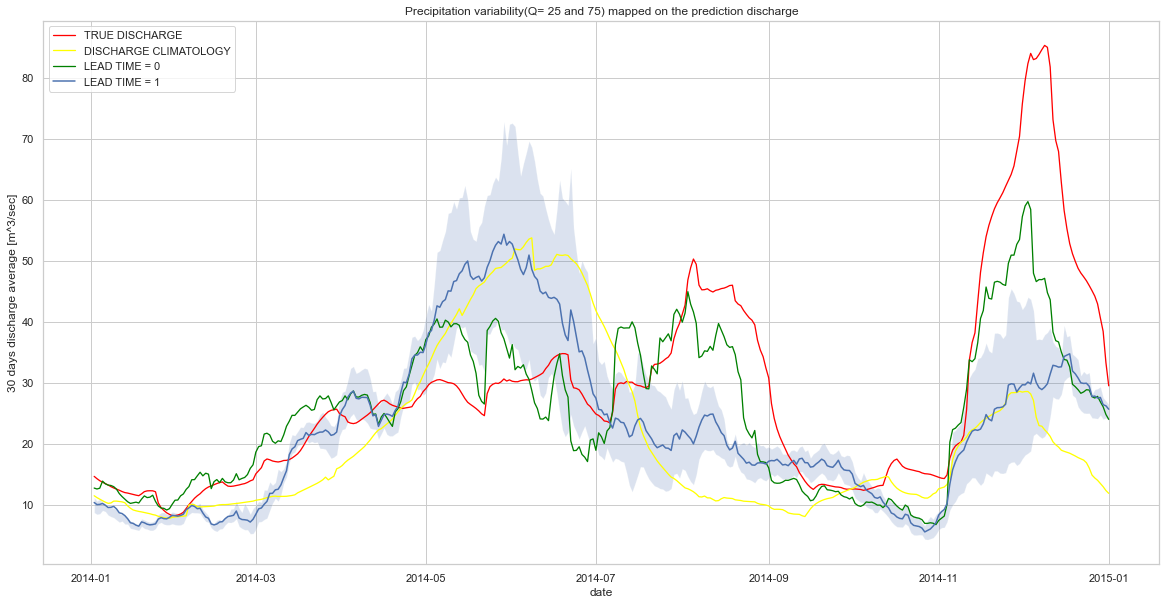

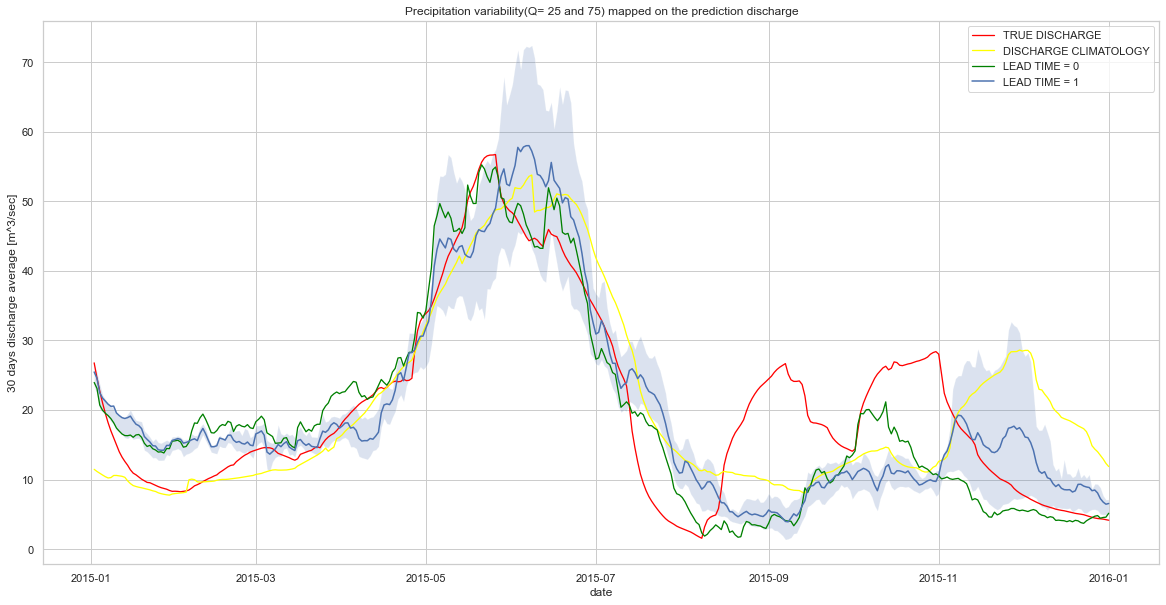

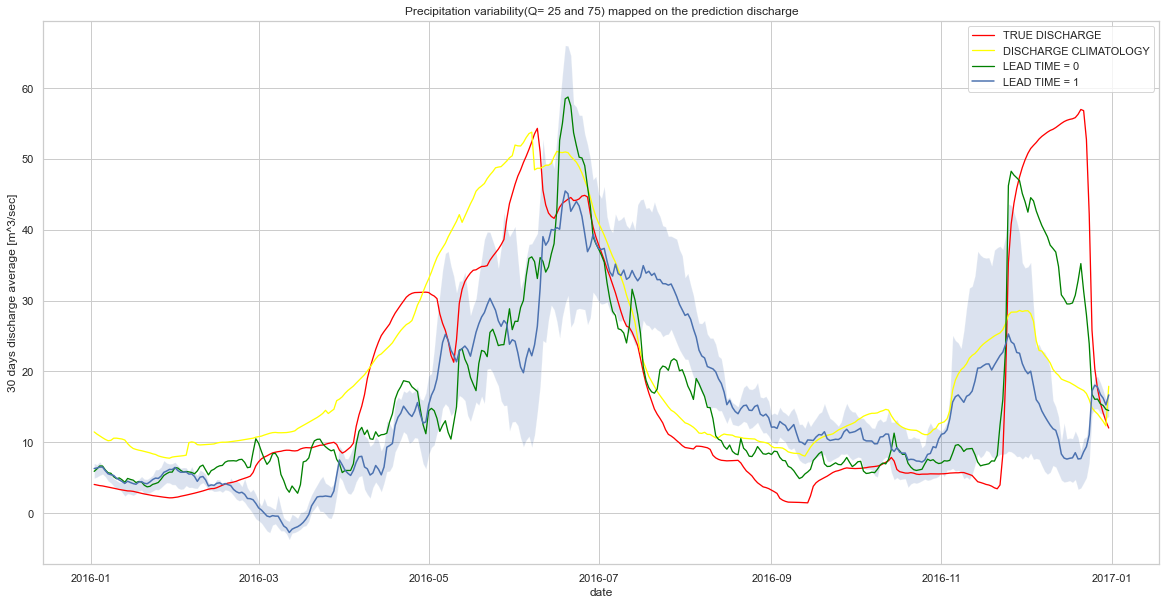

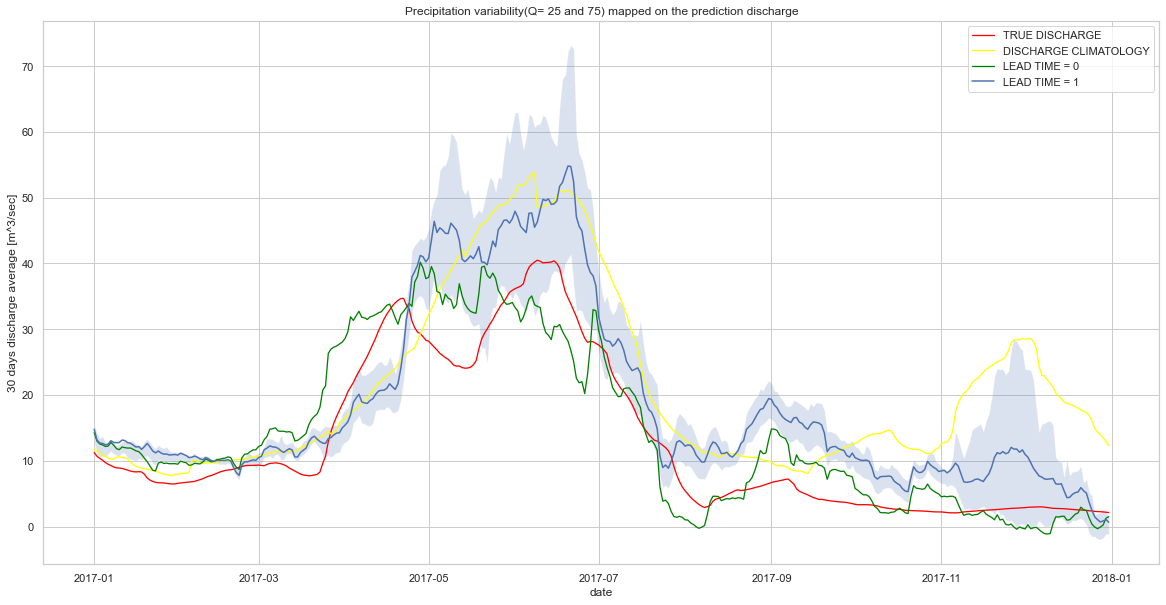

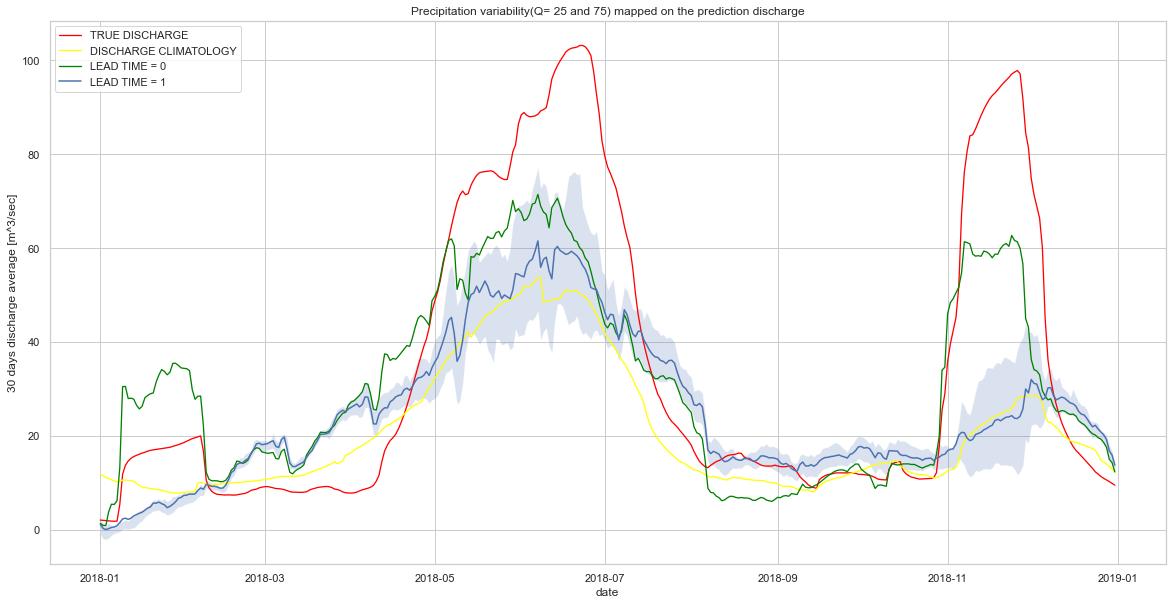

In [16]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions2)

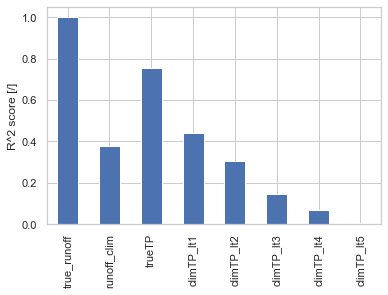

In [17]:
r2_B= evaluate_prediction(predictions2)

### ANALYSE RESULTS AS ANOMALIES

### 1) PREDICT THE WHOLE SERIES WITH CLASSIC CV

In [18]:
predictions_for_clim2 = classic_CV_SVR_predict(daily_input_stat2, C2, eps2, t_length, t_unit, n_splits)

In [19]:
climatologies2 =predictions_for_clim2.groupby(by=predictions_for_clim2.index.day_of_year).mean().loc[:,['prediction','true_runoff']]
climatologies2['doty']=climatologies2.index


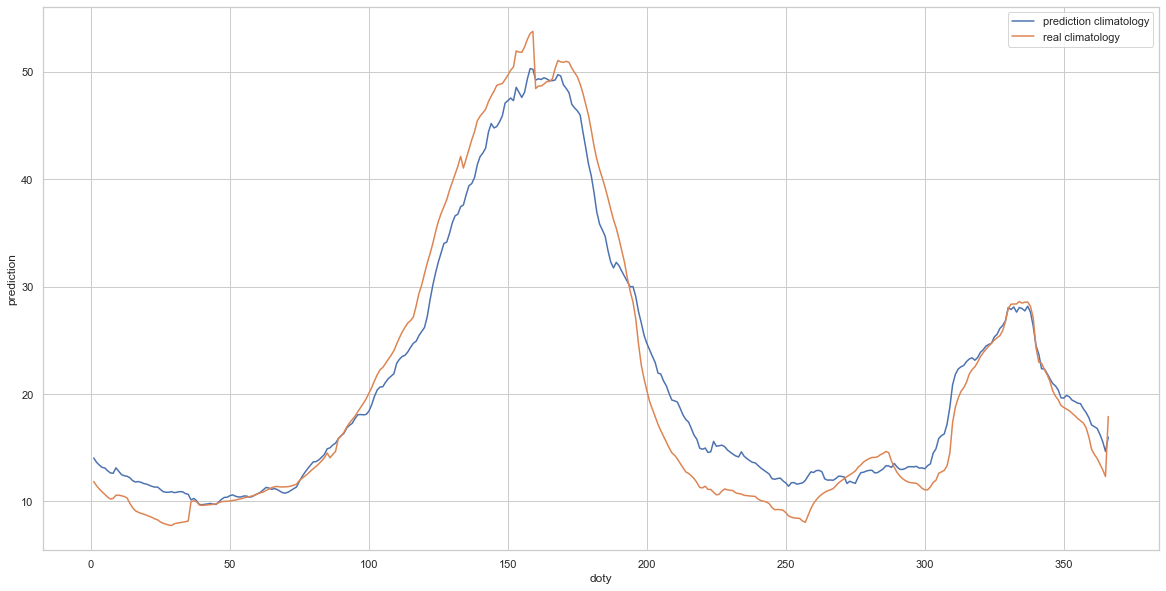

In [20]:
sns.set_theme(style="whitegrid")
ax,fig=plt.subplots(figsize=(20,10))
sns.lineplot(data=climatologies,x='doty',y='prediction',label='prediction climatology')
sns.lineplot(data=climatologies,x='doty',y='true_runoff',label='real climatology')
plt.legend()

### 2) COMPUTE THE ANOMALIES AND PLOT THEM

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

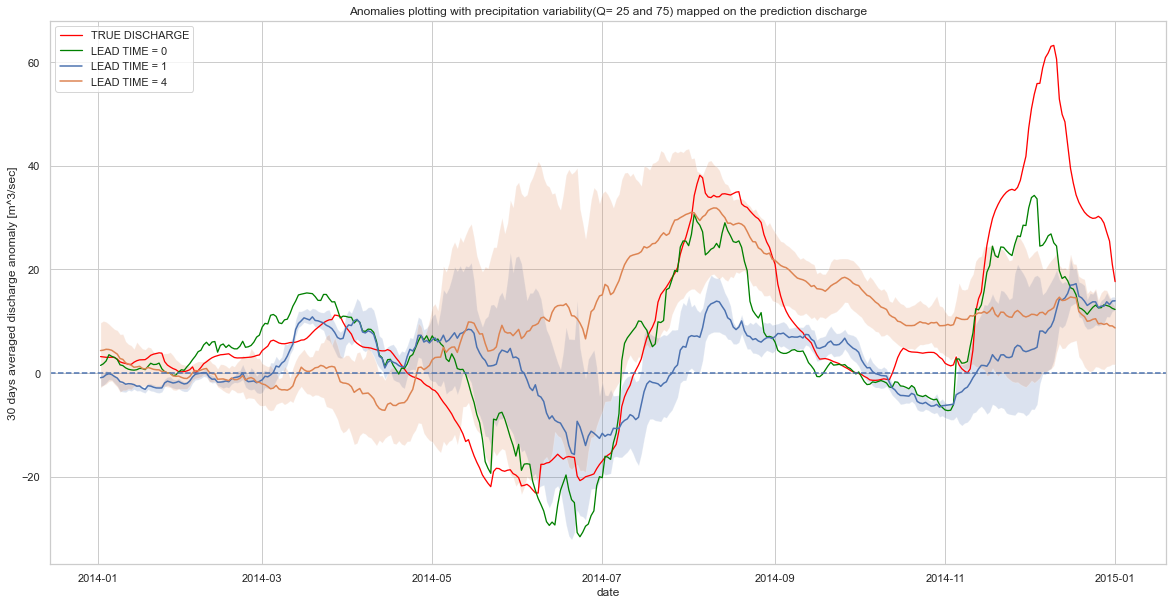

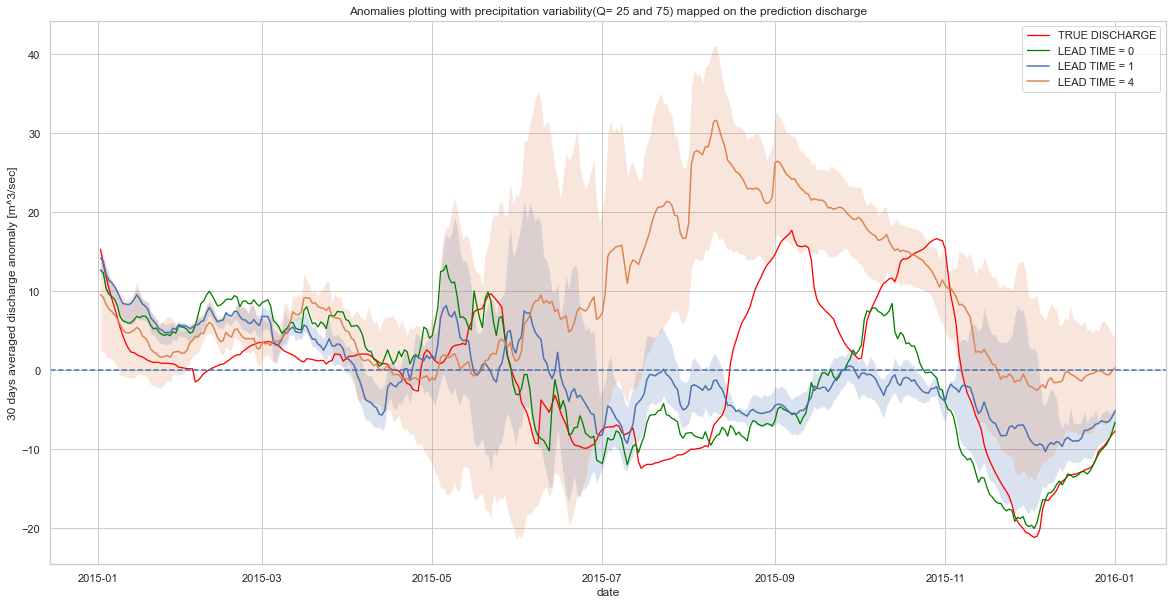

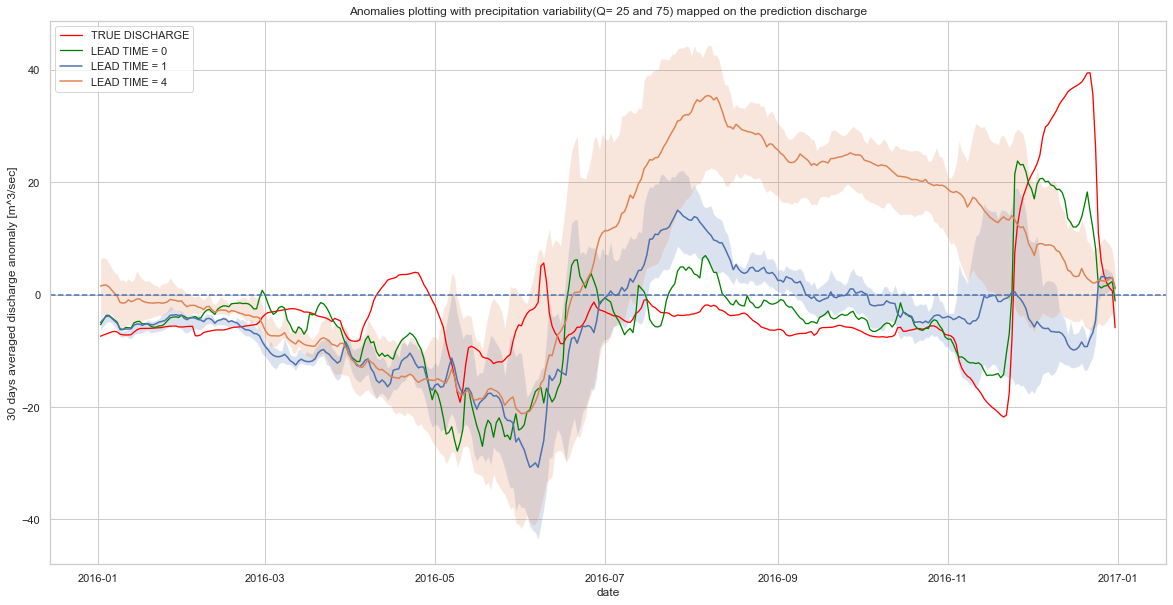

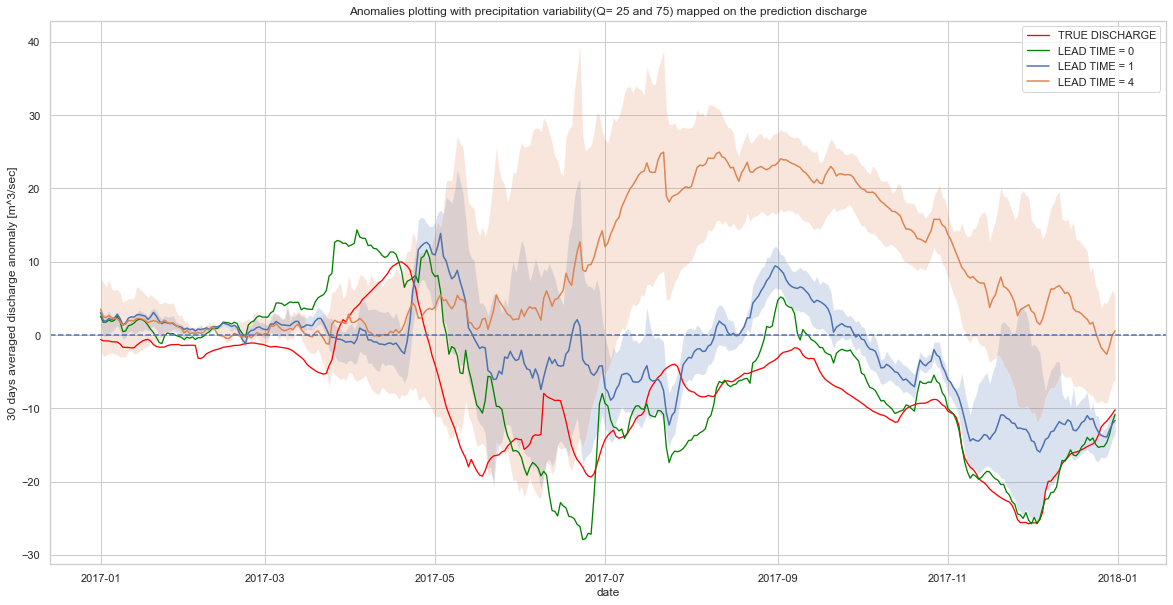

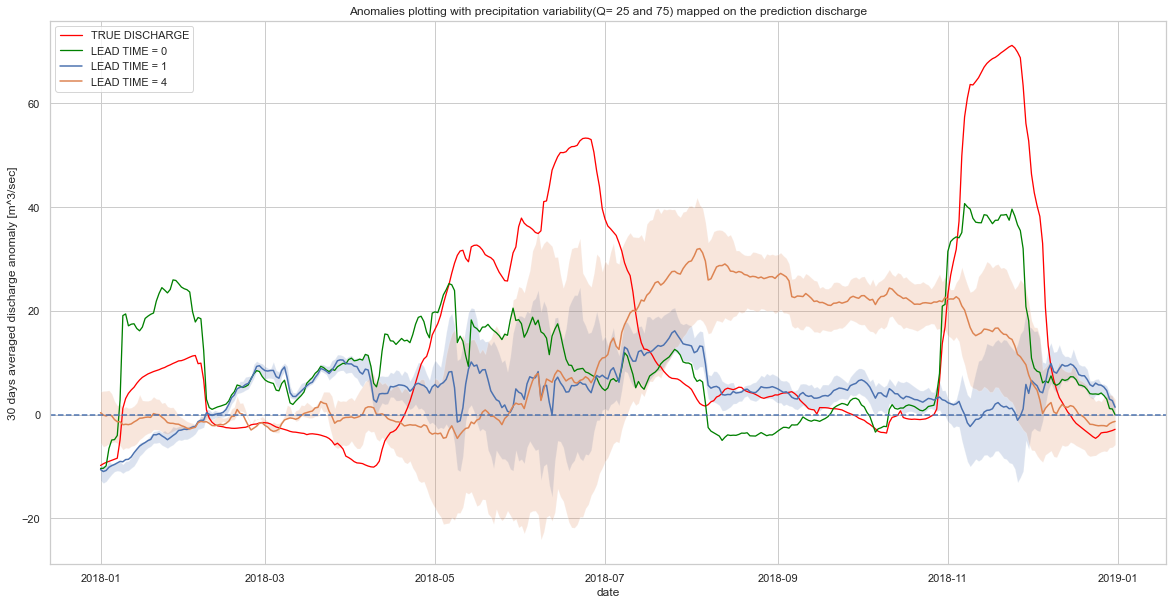

In [21]:
a2=compute_anomalies(climatologies2, predictions2)
a2['split']=predictions2.split

plot_anomalies(a2)

## C) NO_EVAP

In [22]:
daily_input_stat3 = daily_input_stat.drop(columns=[c for c in daily_input_stat.columns if c[0]=='E'])

Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"


Fitting 1 folds for each of 50 candidates, totalling 50 fits


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\sklearn\compose\_target.py:152: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn("The provided functions or transformer are"



C3=0.31622776601683794
eps3=0.0017782794100389228


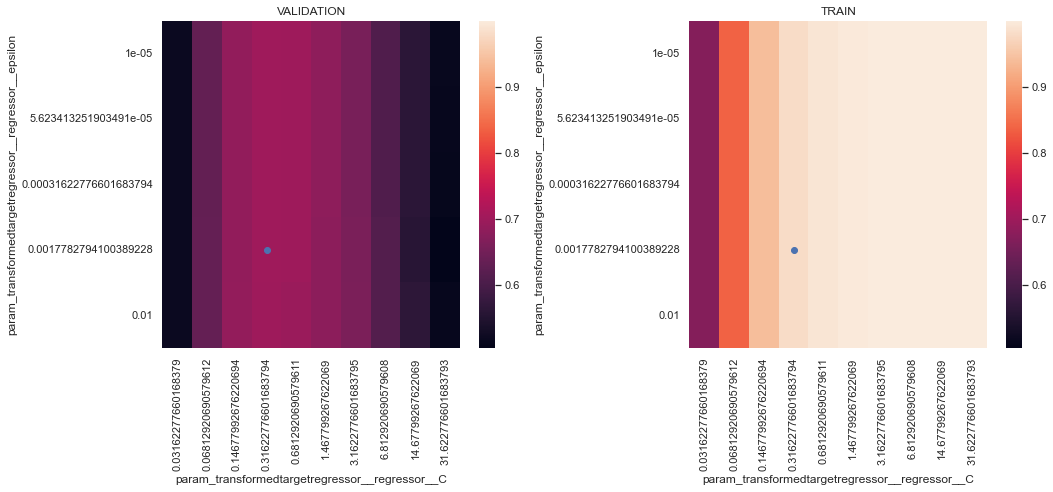

In [23]:
C3, eps3 = SVR_nested_CV_gridsearch(daily_input_stat3, C_range, epsilon_range, t_range, t_unit, n_splits, test_size)
print(f'C3={C3}')
print(f'eps3={eps3}')

C3=3.162277
eps3=0.01

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [24]:
radius_for_ensemble = 1
predictions3 = nested_CV_SVR_predict(daily_input_stat3, C3, eps3, t_length, t_unit, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

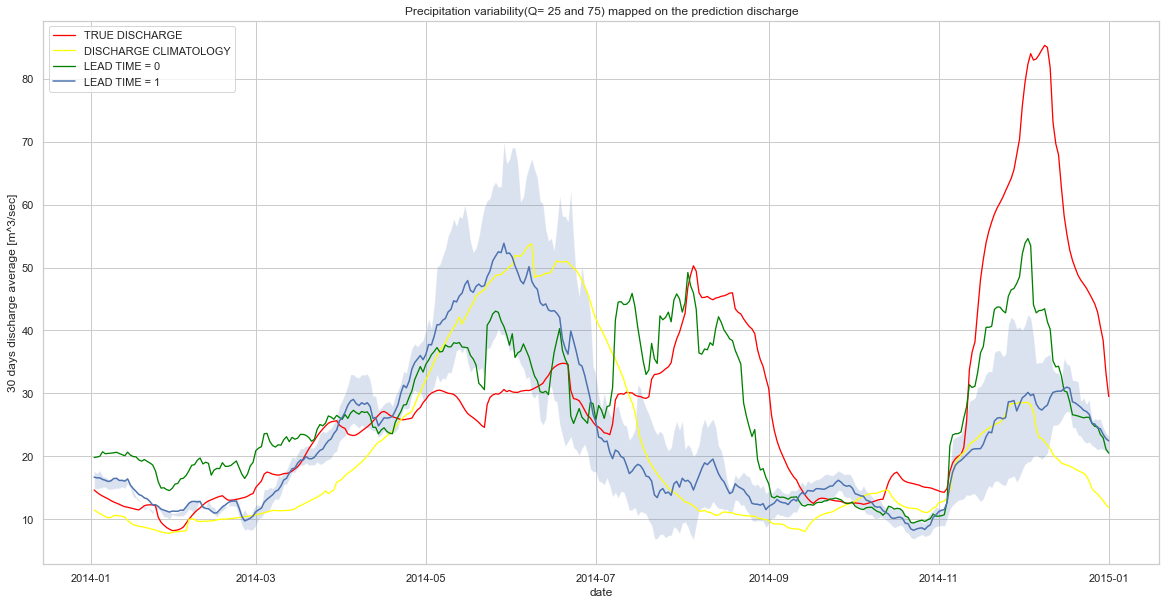

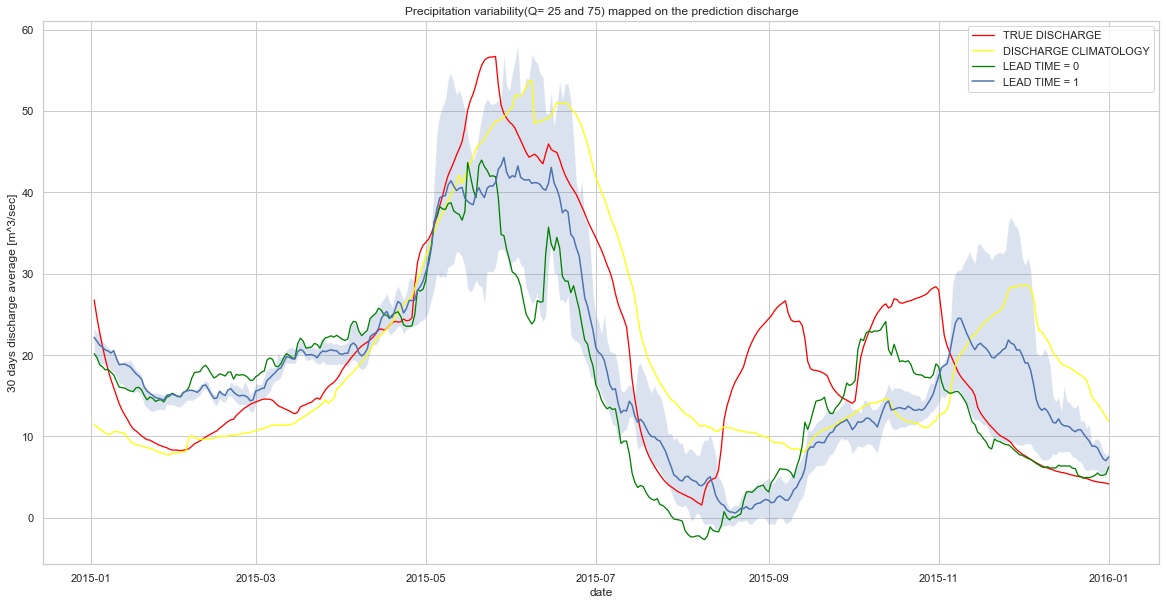

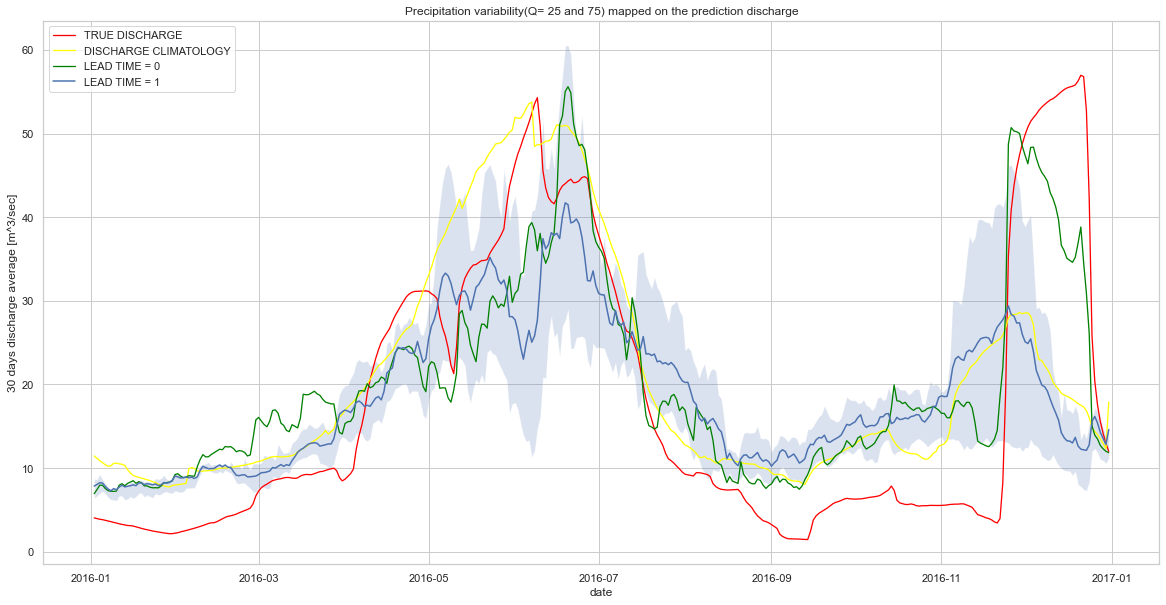

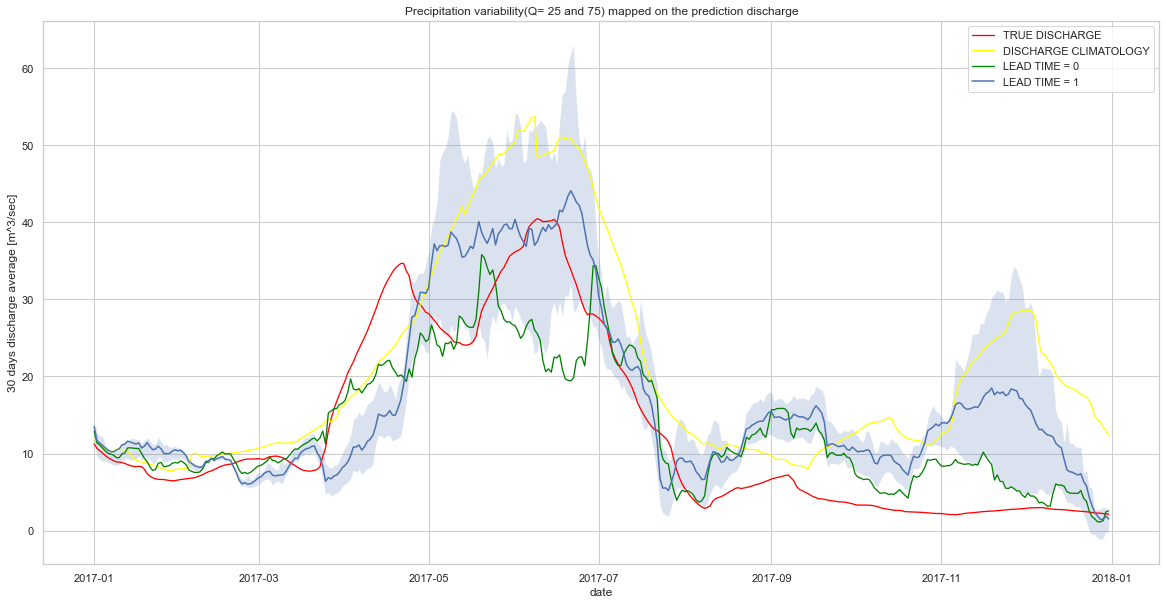

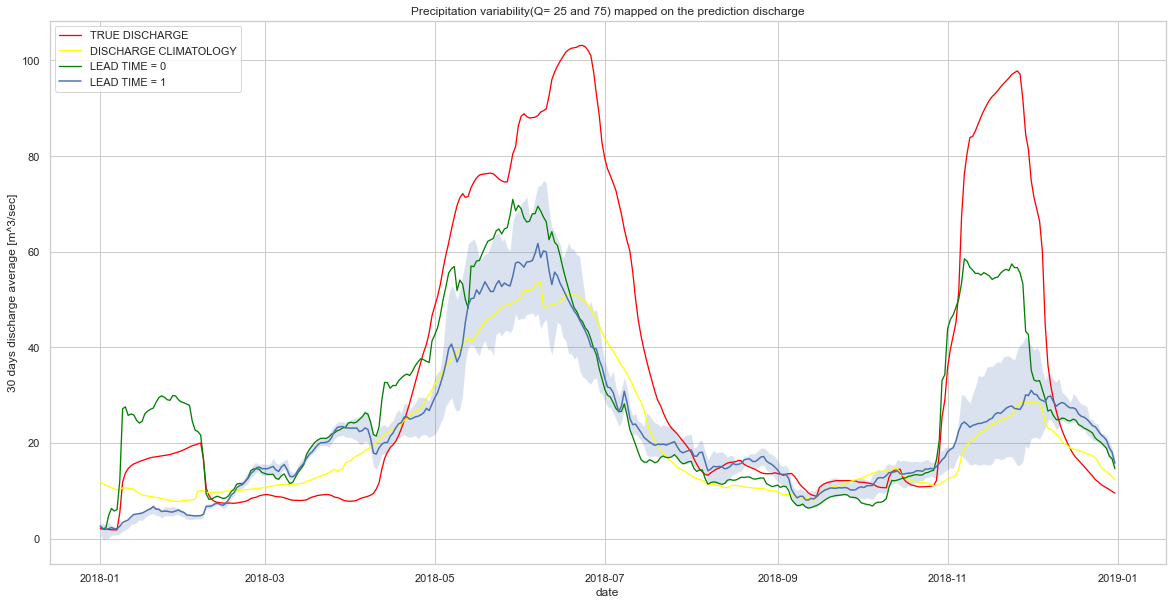

In [25]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions3)

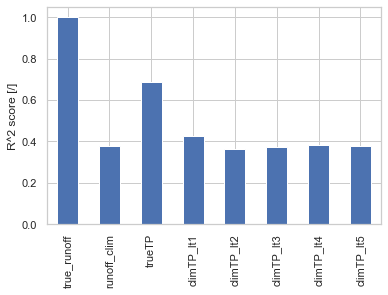

In [26]:
r2_C= evaluate_prediction(predictions3)

### ANALYSE RESULTS AS ANOMALIES

### 1) PREDICT THE WHOLE SERIES WITH CLASSIC CV

In [27]:
predictions_for_clim3 = classic_CV_SVR_predict(daily_input_stat3, C3, eps3, t_length, t_unit, n_splits)

In [28]:
climatologies3 =predictions_for_clim3.groupby(by=predictions_for_clim3.index.day_of_year).mean().loc[:,['prediction','true_runoff']]
climatologies3['doty']=climatologies3.index


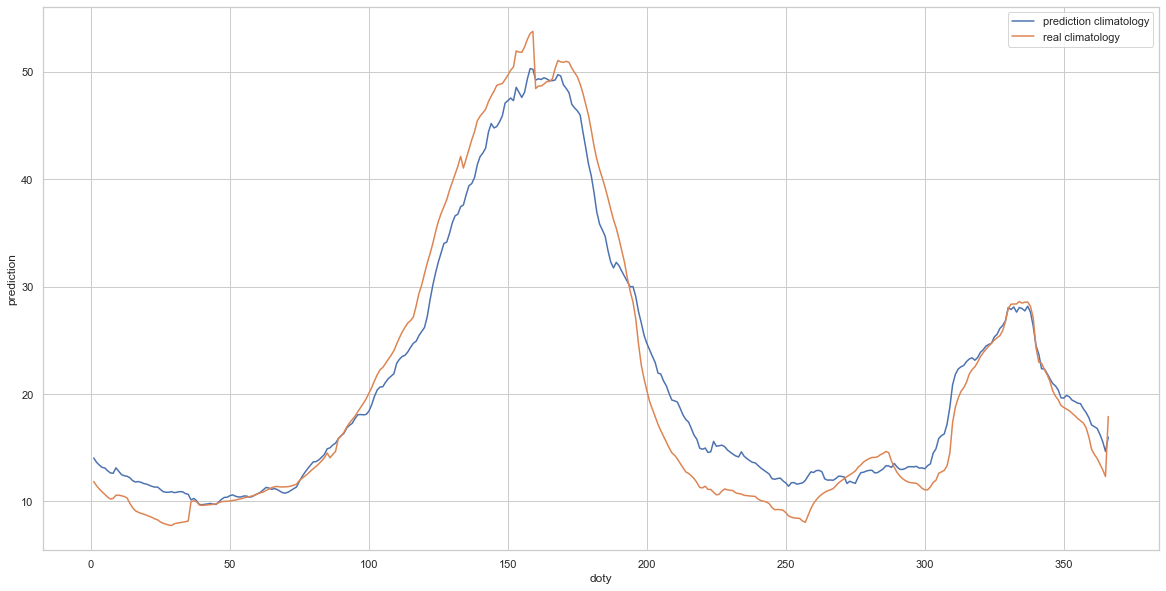

In [29]:
sns.set_theme(style="whitegrid")
ax,fig=plt.subplots(figsize=(20,10))
sns.lineplot(data=climatologies,x='doty',y='prediction',label='prediction climatology')
sns.lineplot(data=climatologies,x='doty',y='true_runoff',label='real climatology')
plt.legend()

### 2) COMPUTE THE ANOMALIES AND PLOT THEM

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

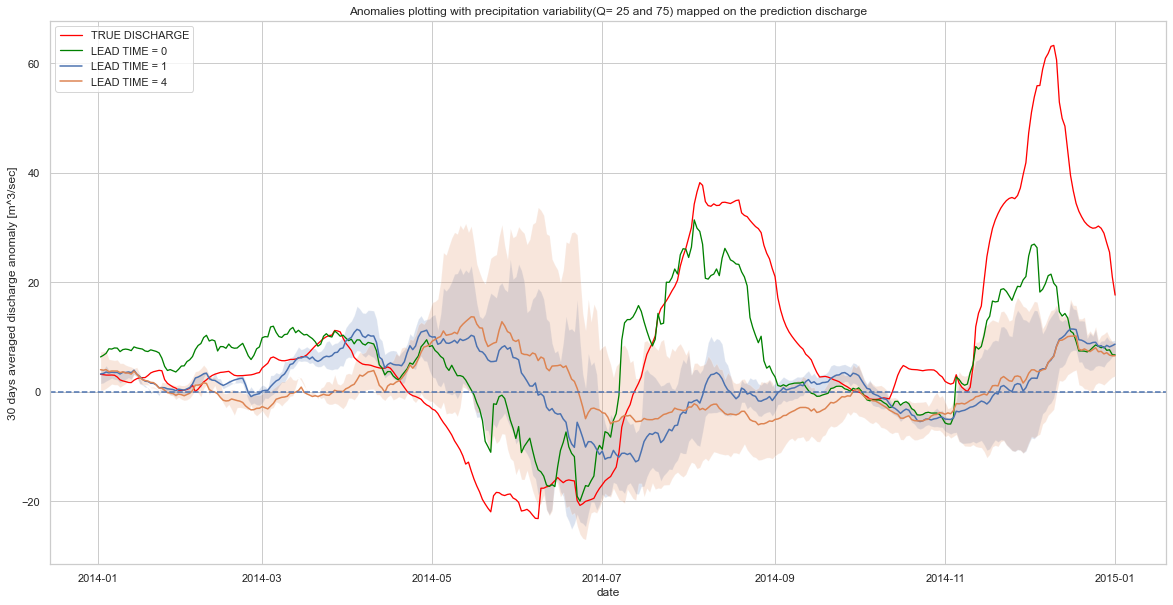

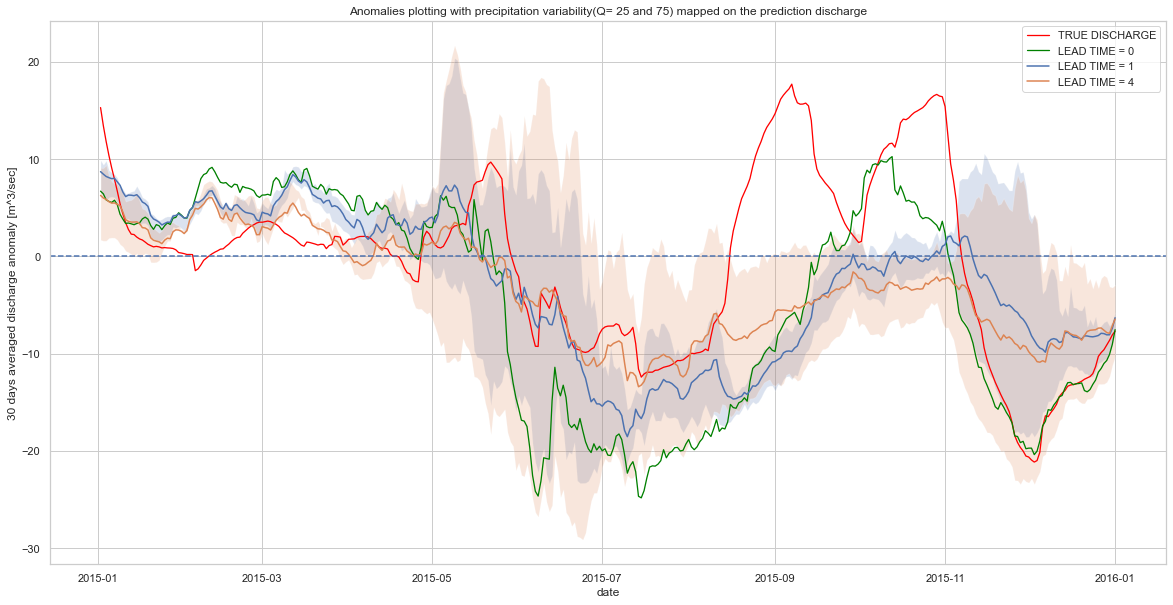

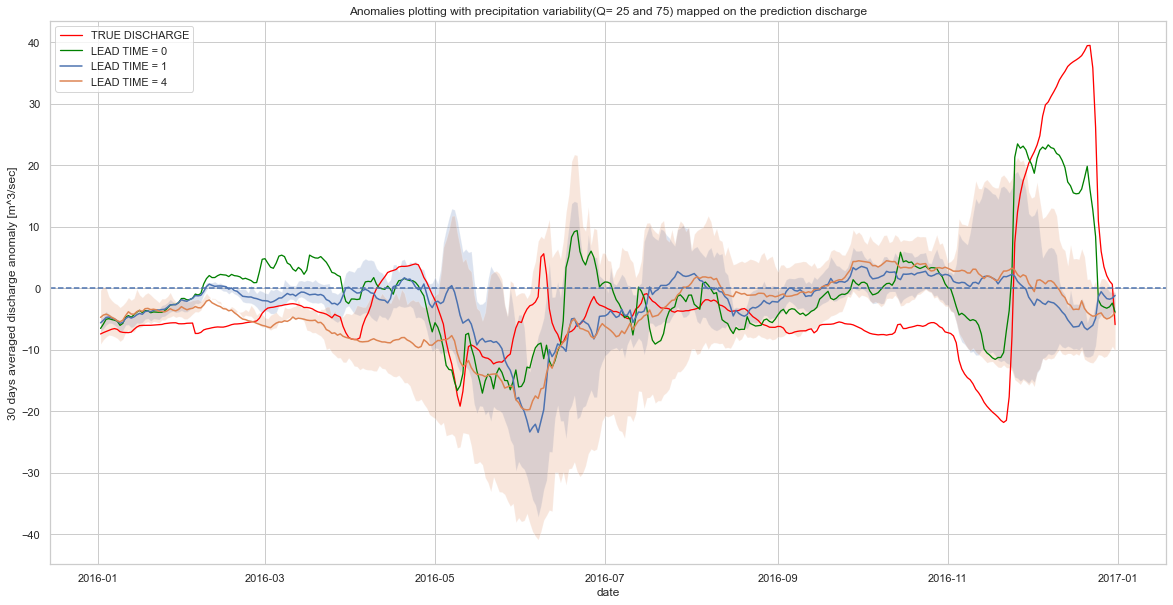

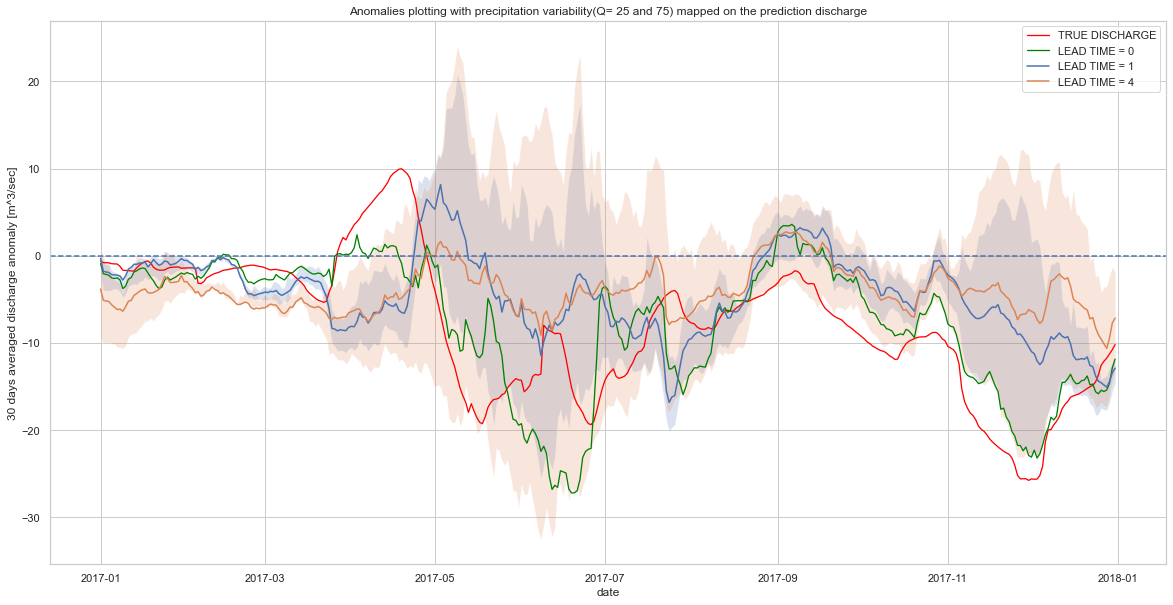

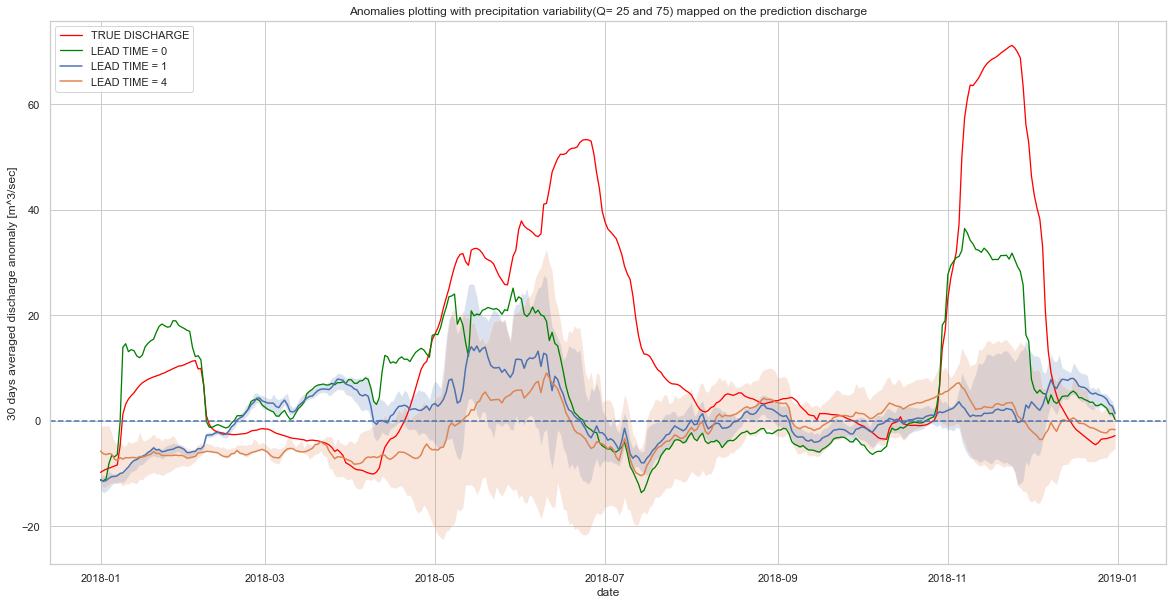

In [30]:
a3=compute_anomalies(climatologies3, predictions3)
a3['split']=predictions3.split

plot_anomalies(a3)

# COMPARE RESULTS

Text(0, 0.5, 'r^2 [/]')

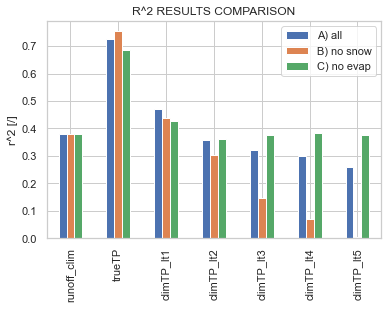

In [31]:
results = pd.concat([r2_A,r2_B,r2_C],axis=1)
results.columns=['A) all','B) no snow','C) no evap']
results.iloc[1:].plot.bar()
plt.title('R^2 RESULTS COMPARISON')
plt.ylabel('r^2 [/]')

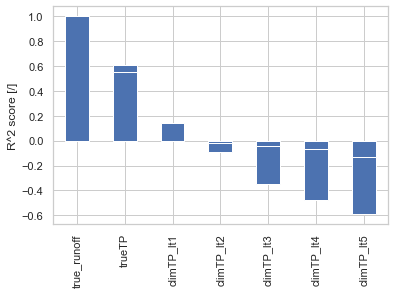

In [32]:
r2_a_C= evaluate_prediction(a3)
r2_a_B = evaluate_prediction(a2)
r2_a_A = evaluate_prediction(a)

Text(0.5, 1.0, 'R^2 RESULTS COMPARISON')

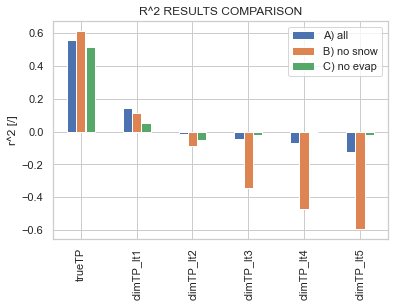

In [33]:
results_a = pd.concat([r2_a_A,r2_a_B,r2_a_C],axis=1)
results_a.columns=['A) all','B) no snow','C) no evap']
results_a.iloc[1:].plot.bar()
plt.ylabel('r^2 [/]')
plt.title('R^2 RESULTS COMPARISON')


In [34]:
arrays = [[np.array(np.repeat((t_unit),8),dtype=object),np.array(results.index)]]
tup=np.concatenate(arrays)
index = pd.MultiIndex.from_arrays(tup, names=["t_unit" , "lt"])

results.index=index

results


A) all  B) no snow  C) no evap
t_unit lt                                           
30     true_runoff  1.000000    1.000000    1.000000
       runoff_clim  0.378261    0.378261    0.378261
       trueTP       0.726377    0.754279    0.686452
       climTP_lt1   0.471658    0.438884    0.426268
       climTP_lt2   0.356829    0.304469    0.361501
       climTP_lt3   0.321797    0.147571    0.375455
       climTP_lt4   0.299881    0.069518    0.383927
       climTP_lt5   0.259024    0.004207    0.376653

In [35]:
arrays = [[np.array(np.repeat((t_unit),7),dtype=object),np.array(results_a.index)]]
tup=np.concatenate(arrays)
index = pd.MultiIndex.from_arrays(tup, names=["t_unit" , "lt"])

results_a.index=index

results_a

A) all  B) no snow  C) no evap
t_unit lt                                           
30     true_runoff  1.000000    1.000000    1.000000
       trueTP       0.556413    0.610217    0.514838
       climTP_lt1   0.143587    0.113194    0.054499
       climTP_lt2  -0.014960   -0.089164   -0.050559
       climTP_lt3  -0.046111   -0.345174   -0.021568
       climTP_lt4  -0.068253   -0.473209   -0.002493
       climTP_lt5  -0.127080   -0.589867   -0.019920

In [36]:
results.to_csv('results/SAN_BENIGNO__30.csv')
results_a.to_csv('results/SAN_BENIGNO__30_a.csv')

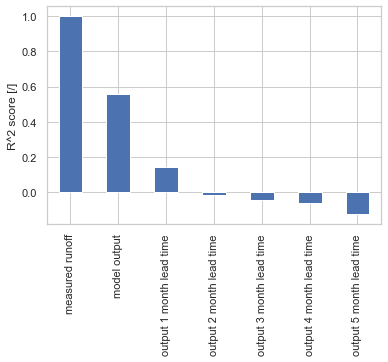

In [85]:
r2_a_A = evaluate_prediction(a)